# Effects of User Characteristics ( ages-types-gender) on Trip Durations
## by sally hamed

## Investigation Overview

> In this investigation, I wanted to look at the characteristics of users that could be used to predict their bike trip duration. The main focus was on the user characteristics : ages, users type, gender, and thier bike trip distances.

## Dataset Overview

> The data consisted of 174880 bike trip  in the dataset with 20 features. The attributes included the  user characteristics, as well as additional measurements such as age of customer and distance of biking trip  that I find necessary to perform analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
gobike = pd.read_csv('201902-fordgobike-tripdata.csv')


In [3]:
#Remove missing values.
gobike.dropna( inplace = True)

In [4]:
# data wrangling.
#Change the duration_sec to duration_min
gobike['duration_min'] = gobike['duration_sec'] / 60



#Calculate the distance between stations.
gobike['distance'] = np.sqrt((gobike['end_station_longitude']- gobike['start_station_longitude']) ** 2
                            +(gobike['end_station_latitude'] - gobike['start_station_latitude']) ** 2)





#Calculate the ages for users.
gobike['age'] = 2019 - gobike['member_birth_year']

no_age_info = (gobike['age']>100)
# remove points with inconsistent depth values.
gobike= gobike.loc[- no_age_info ,:]

# Bin edges that will be used to "cut" the data into groups.
bin_edges = [0,10, 20, 30, 40, 50, 60, 70, 80, 90, 100] 

# Labels for the agelevel groups.
bin_names = ["child","teen","young_adult","30s","40s", "50s", "retirement", "70s", "80s", "90s" ] 

# Creates age_levels column.
gobike['age_levels']=pd.cut(gobike['age'],bin_edges, labels=bin_names)


## Distribution of Trip Duration

> The trip duration distribution looks normalon a logarithmic scale, with one peak between 4 and 5 minutes. Looks like at least 75% of the trip durations are less than 15 minutes. On average, a user did a ride in no more than 11.15 minutes

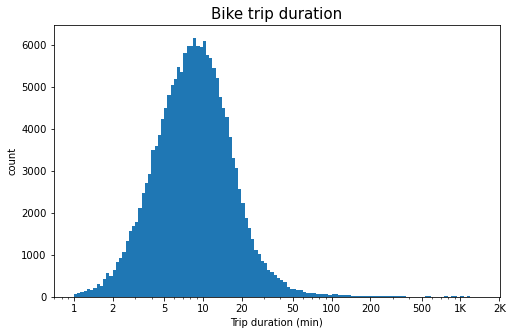

In [5]:
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(gobike['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = gobike, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1e3, 2e3], [1, 2, 5, 10, 20, 50, 100, 200, 500, '1K', '2K'])
plt.ylabel('count')
plt.xlabel('Trip duration (min)')
plt.title('Bike trip duration',fontsize = 15)
plt.show()

## Distribution of Distance

> The trip distance show a right skweed distribution and the peak is around 0.016 mi,also data show the max distance is 0.70 mi ~1.25km.

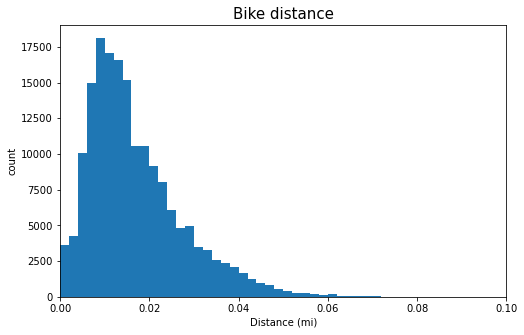

In [6]:
bins = np.arange(0,gobike['distance'].max()+0.002, 0.002)
plt.figure(figsize = [8,5])
plt.hist(data = gobike, x = 'distance', bins = bins)
plt.xlabel('Distance (mi)')
plt.ylabel('count')
plt.title('Bike distance',fontsize = 15)
plt.xlim([0,.1]);


# Distribution of  User Characteristics
the distributions show:
- The number of male larger than the number of female and the other.
- The number of subscriber largely exceeds that of customer. This indicates good relationship and satisfactions from the users with the services provided



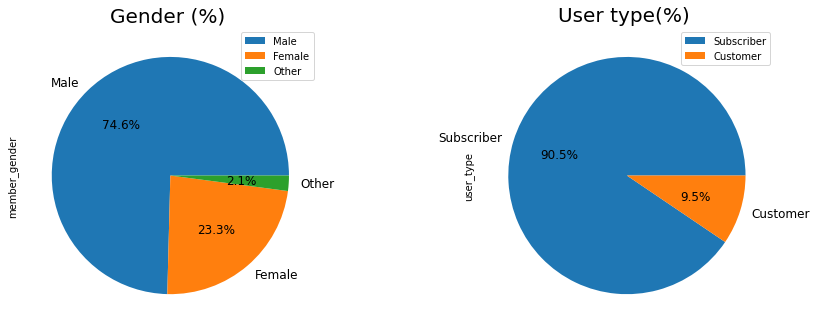

In [7]:
plt.figure(figsize = [15, 12])

plt.subplot(2, 2, 1)
all_gender = gobike['member_gender'].value_counts()
all_gender.plot(kind='pie', autopct='%1.1f%%', fontsize = 12);
plt.title('Gender (%) ', fontsize = 20)
plt.legend()

ax = plt.subplot(2, 2, 2)
all_user = gobike['user_type'].value_counts()
all_user.plot(kind='pie', autopct='%1.1f%%', fontsize = 12);
plt.title('User type(%) ', fontsize = 20);
plt.legend()
plt.show();

# Distribution of UserType across Gender
>It is clear that the number of subscriber is  more than that of the customer,also we can see male subscribers are much  more than female subscribers

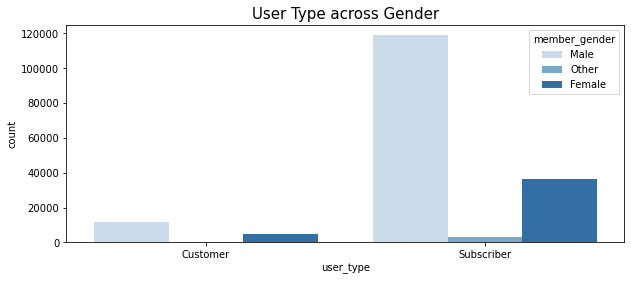

In [8]:
plt.figure(figsize = [10,4])

sb.countplot(data = gobike, x = 'user_type', hue = 'member_gender', palette = 'Blues')
plt.title('User Type across Gender', fontsize = 15);

# Distribution of User Ages
>The major age range of using bike are 25:40

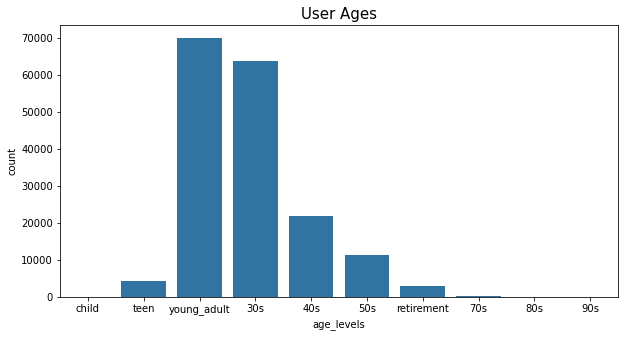

In [9]:
plt.figure(figsize = [10,5])
base_color = sb.color_palette()[0]
sb.countplot(data=gobike, x='age_levels',color=base_color)
plt.title('User Ages', fontsize = 15);

# Distribution of User Ages VS. Trip Distance
>It obviously from distribution that the long trip seem to be clustered around that  25:35's age range and The major age range of using bike are 25:40

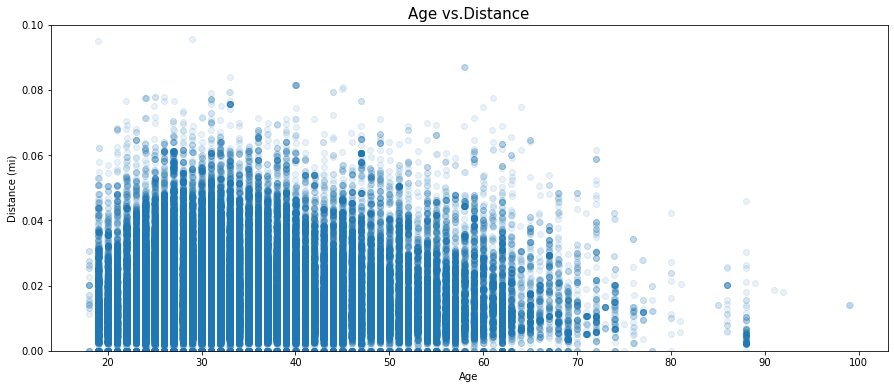

In [10]:
plt.figure(figsize = [15, 6])

sb.regplot(data = gobike ,x = 'age', y = 'distance', x_jitter=0.04, scatter_kws={'alpha':1/10},fit_reg = False)
plt.ylim(0,0.1)
plt.title('Age vs.Distance',fontsize = 15)
plt.xlabel('Age')
plt.ylabel('Distance (mi)');


# Distribution of Trip Duration across Ages and Gender
>The distribution seem to be indication that male rides longer than the other and female. when it comes to older ages males use the bike more.

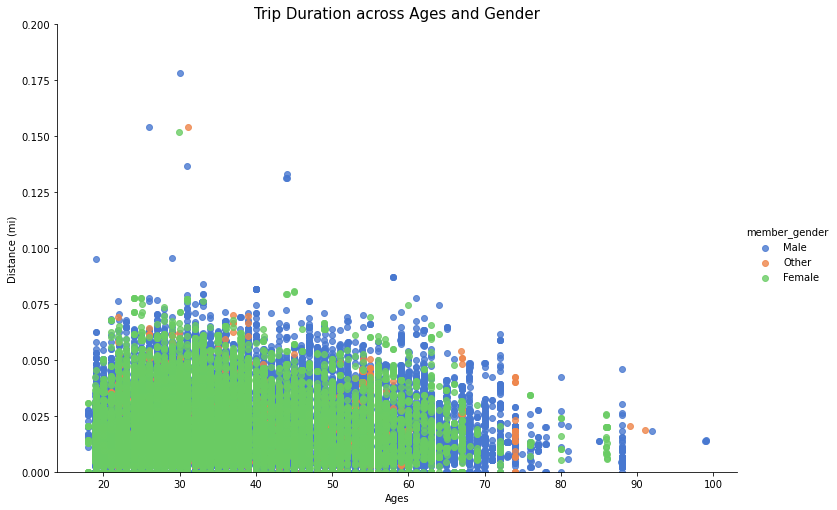

In [11]:
g = sb.FacetGrid(data = gobike, hue = 'member_gender', size = 7,aspect=1.5,ylim=[0,0.2],palette='muted')
                
g.map(sb.regplot, 'age', 'distance', x_jitter=0.04 ,fit_reg = False)
g.add_legend()
g.set_xlabels('Ages')
g.set_ylabels('Distance (mi)')
plt.title('Trip Duration across Ages and Gender',fontsize = 15)
plt.show()


# Trip Duration by Age and Gender for User Type
>There are huge difference between subscribers and customers in durations in all ages, although the difference in distances is small.

>The customer has a higher average duration than the subsriber.


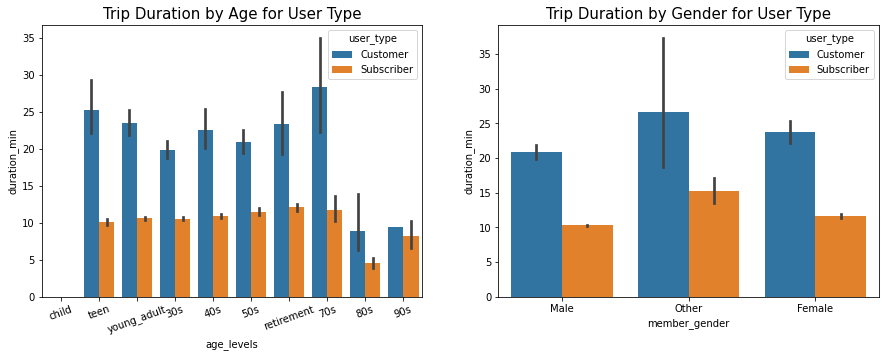

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sb.barplot(data=gobike, x='age_levels', y='duration_min', hue='user_type')
plt.xticks(rotation=20)
plt.title('Trip Duration by Age for User Type',fontsize = 15)
plt.subplot(1,2,2)
sb.barplot(data=gobike, x='member_gender', y='duration_min', hue='user_type')
plt.title('Trip Duration by Gender for User Type',fontsize = 15)
plt.show()

In [ ]:
!jupyter nbconvert slide_deck_bike_share.ipynb --to slides --post serve --no-input --no-prompt